In this notebook, we collect stock price data from yahoo finance, a media property that is part of Yahoo!'s network. <br> 
We utilize the yfinance api https://pypi.org/project/yahoo-finance/ by Ran Aroussi. <br>
Credits: Rohan Joseph https://towardsdatascience.com/downloading-historical-stock-prices-in-python-93f85f059c1f <br>
We perform feature engineering and perform a binary classification of the price change based on stock prices.

In [1]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

In [2]:
# Time period for stock data
from datetime import date
start = datetime.datetime(2016,1,1)
end = date.today()

In [3]:
'''
# Get stock ticker symbols listed on NASDAQ
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))
'''

'\n# Get stock ticker symbols listed on NASDAQ\nurl="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"\ns = requests.get(url).content\ncompanies = pd.read_csv(io.StringIO(s.decode(\'utf-8\')))\n'

In [4]:
#Symbols = companies['Symbol'].tolist()

In [5]:
'''
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None
        '''

"\n# create empty dataframe\nstock_final = pd.DataFrame()\n# iterate over each symbol\nfor i in Symbols:  \n    \n    # print the symbol which is being downloaded\n    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  \n    \n    try:\n        # download the stock price \n        stock = []\n        stock = yf.download(i,start=start, end=end, progress=False)\n        \n        # append the individual stock prices \n        if len(stock) == 0:\n            None\n        else:\n            stock['Name']=i\n            stock_final = stock_final.append(stock,sort=False)\n    except Exception:\n        None\n        "

In [6]:
# read dataset of stock information of GOOG between 2004 and 2021 March downloaded from yfinance
stock_final = pd.read_csv('GOOG.csv')

In [7]:
stock_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4.170000e+03
mean,566.693947,572.273075,561.124719,566.842783,566.842783,6.711347e+06
std,432.299874,437.037650,428.293091,432.843126,432.843126,7.901866e+06
min,49.409801,50.680038,47.800831,49.818268,49.818268,7.922000e+03
25%,241.603168,244.629319,239.423836,241.614365,241.614365,1.671425e+06
50%,358.496277,362.531143,355.584686,359.116440,359.116440,4.015696e+06
75%,806.782486,809.392486,801.610000,806.130020,806.130020,8.554595e+06
max,2119.270020,2152.679932,2104.360107,2128.310059,2128.310059,8.254163e+07


In [8]:
stock_final.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4165,2021-03-08,2101.129883,2128.810059,2021.609985,2024.170044,2024.170044,1646000
4166,2021-03-09,2070.000000,2078.040039,2047.829956,2052.699951,2052.699951,1696400
4167,2021-03-10,2071.760010,2075.000000,2033.369995,2055.030029,2055.030029,1267800
4168,2021-03-11,2074.060059,2125.699951,2072.379883,2114.770020,2114.770020,1238300
4169,2021-03-12,2085.000000,2090.260010,2047.550049,2061.919922,2061.919922,1725000


In [9]:
#check missing data
stock_final.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# number of companies with stock data
#stock_final['Name'].nunique()

In [11]:
# get Alphabet stock from all the companies' data
# Alphabet_stock = stock_final[stock_final['Name'] == 'GOOGL']
# Alphabet_stock

In [12]:
Alphabet_stock = stock_final

Text(0, 0.5, 'Close prices for GOOGL')

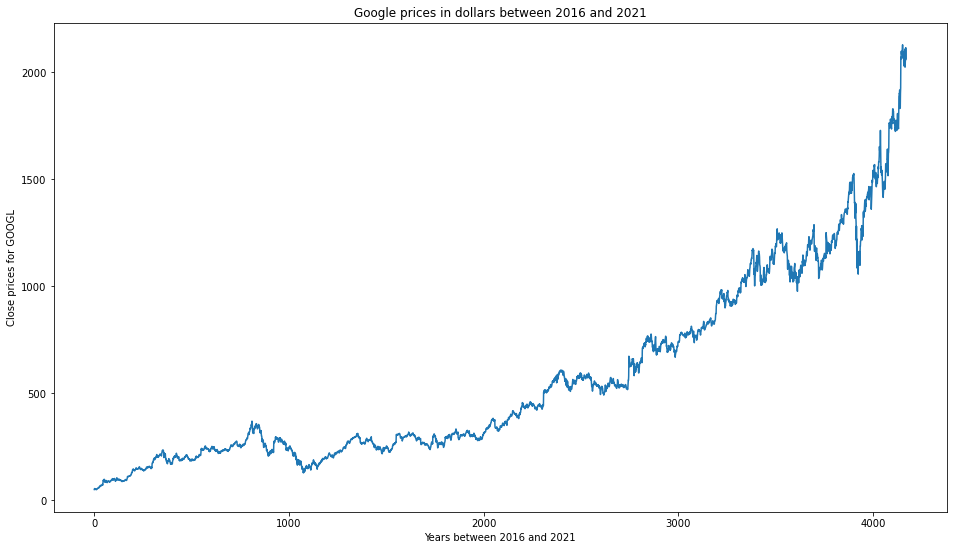

In [13]:
#Plot alphanbet stock since 2016
import matplotlib.pyplot as plt
import seaborn
ax = Alphabet_stock['Adj Close'].plot(figsize=(16, 9), title='Google prices in dollars between 2016 and 2021')
ax.set_xlabel("Years between 2016 and 2021")
ax.set_ylabel("Close prices for GOOGL")

Define a certain window: month, year etc <br>
More like a fourier window: one year, one month? different window sizes. <br>
Inside the window, derive several descriptors to use ML for predicition <br>
Feature engineering <br>
Given maximum price, min price (two descriptors), derive the ratio, average price, standard deviation of the price, <br>
all time high price, time past since price peaked <br>
Skewness of the price. <br>
Plot histogram of the price, say with 10 bins of the fourier transform of the prices. <br>
Check how important the entropy is<br>
Linear regression coefficient of the price and the date <br>
Pearson coefficient between price and date <br>
Take care of delisted companies on the url list of NASDAQ companies

# Price analysis for Alphabet stock

We plot the moving averages for prices for 50, 100, and 200 days. <br>
We plot the average, minimum, and maximum prices for Alphabet stock between 2016 and 2021. <br>
We also derive the highest price per year and all time high price.

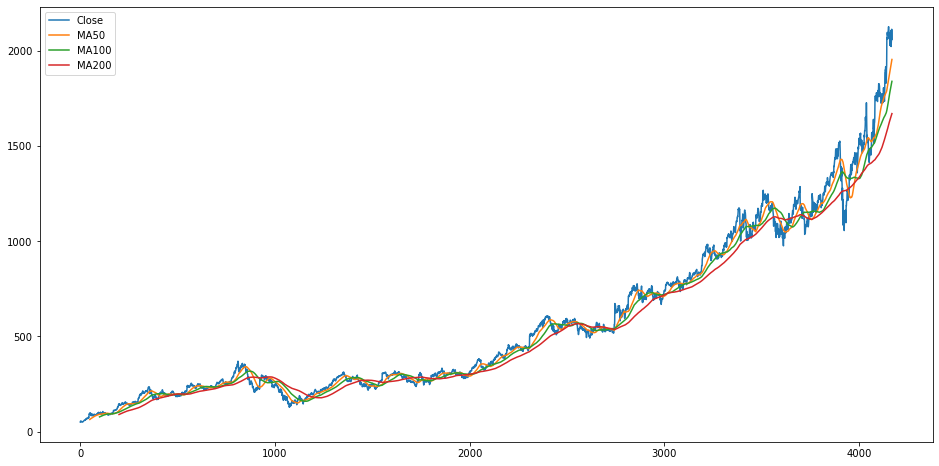

In [14]:
# moving average for 50, 100, and 200 days
Alphabet_stock['MA50'] = Alphabet_stock['Close'].rolling(50).mean()
Alphabet_stock['MA100'] = Alphabet_stock['Close'].rolling(100).mean()
Alphabet_stock['MA200'] = Alphabet_stock['Close'].rolling(200).mean()
Alphabet_stock[['Close', 'MA50', 'MA100', 'MA200']].plot(label = 'DAL', figsize = (16, 8)); 

In [15]:
Alphabet_stock.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
MA50         float64
MA100        float64
MA200        float64
dtype: object

In [16]:
# The index column is currently the datetime which we need to analyze the stock.
# We convert the current index column to a normal column
Alphabet_stock.reset_index(inplace=True)

In [17]:
Alphabet_stock

,index,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA100,MA200
0,0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,NaN,NaN,NaN
1,1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,NaN,NaN,NaN
2,2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,NaN,NaN,NaN
3,3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,NaN,NaN,NaN
4,4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4165,4165,2021-03-08,2101.129883,2128.810059,2021.609985,2024.170044,2024.170044,1646000,1930.427400,1820.926801,1658.205497
4166,4166,2021-03-09,2070.000000,2078.040039,2047.829956,2052.699951,2052.699951,1696400,1936.833799,1825.737000,1661.454997
4167,4167,2021-03-10,2071.760010,2075.000000,2033.369995,2055.030029,2055.030029,1267800,1943.157400,1830.606500,1664.678047
4168,4168,2021-03-11,2074.060059,2125.699951,2072.379883,2114.770020,2114.770020,1238300,1949.931001,1836.162900,1668.166797


In [18]:
Alphabet_stock.dtypes

index          int64
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
MA50         float64
MA100        float64
MA200        float64
dtype: object

In [19]:
# convert date from float to datetime type
Alphabet_stock['Date'] =  pd.to_datetime(Alphabet_stock['Date'], format = '%Y-%m-%d')

In [20]:
Alphabet_stock

,index,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA100,MA200
0,0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,NaN,NaN,NaN
1,1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,NaN,NaN,NaN
2,2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,NaN,NaN,NaN
3,3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,NaN,NaN,NaN
4,4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4165,4165,2021-03-08,2101.129883,2128.810059,2021.609985,2024.170044,2024.170044,1646000,1930.427400,1820.926801,1658.205497
4166,4166,2021-03-09,2070.000000,2078.040039,2047.829956,2052.699951,2052.699951,1696400,1936.833799,1825.737000,1661.454997
4167,4167,2021-03-10,2071.760010,2075.000000,2033.369995,2055.030029,2055.030029,1267800,1943.157400,1830.606500,1664.678047
4168,4168,2021-03-11,2074.060059,2125.699951,2072.379883,2114.770020,2114.770020,1238300,1949.931001,1836.162900,1668.166797


Text(0.5, 0, 'Stock prices for GOOGL between between 2016 and 2021')

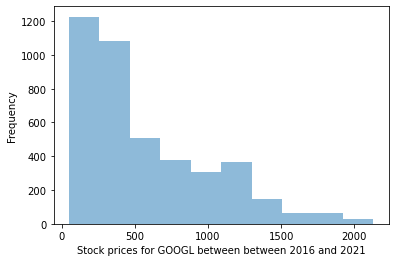

In [21]:
# plot the price of the stock of GOOGL on a histogram with 10 bins
ax = Alphabet_stock['Close'].plot.hist(bins=10, alpha=0.5)
ax.set_xlabel("Stock prices for GOOGL between between 2016 and 2021")

Text(0, 0.5, 'Average Close prices')

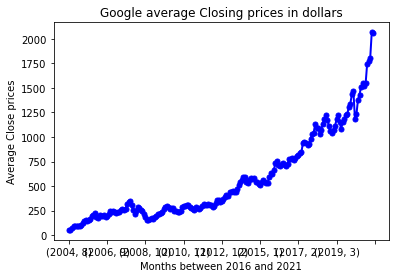

In [22]:
#return the average prices for each month for 'GOOGL'
Alphabet_stock_av = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year, Alphabet_stock.Date.dt.month]).mean()

ax = Alphabet_stock_av.plot(lw=2, colormap='brg', marker='.', markersize=10, title='Google average Closing prices in dollars')
ax.set_xlabel("Months between 2016 and 2021")
ax.set_ylabel("Average Close prices")

In [23]:
Alphabet_stock_av

Date  Date
2004  8         52.434573
      9         56.402162
      10        76.329375
      11        88.416214
      12        90.545612
                 ...     
2020  11      1748.348499
      12      1772.278182
2021  1       1808.383693
      2       2068.356824
      3       2065.028015
Name: Close, Length: 200, dtype: float64

Text(0, 0.5, 'Minimum Close prices')

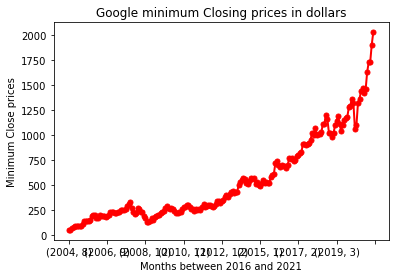

In [24]:
#return the minimum prices for each month for 'GOOGL'
Alphabet_stock_min = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year, Alphabet_stock.Date.dt.month]).min()

ax = Alphabet_stock_min.plot(lw=2, colormap='flag', marker='.', markersize=10, title='Google minimum Closing prices in dollars')
ax.set_xlabel("Months between 2016 and 2021")
ax.set_ylabel("Minimum Close prices")

Text(0, 0.5, 'Maximum Close prices')

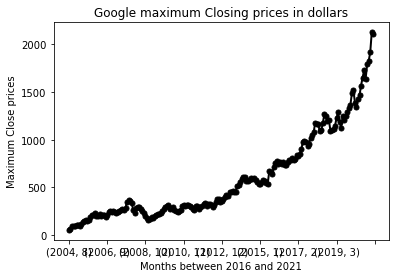

In [25]:
#return the maximum prices for each month for 'GOOGL'
Alphabet_stock_max = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year, Alphabet_stock.Date.dt.month]).max()

ax = Alphabet_stock_max.plot(lw=2, colormap='nipy_spectral', marker='.', markersize=10, title='Google maximum Closing prices in dollars')
ax.set_xlabel("Months between 2016 and 2021")
ax.set_ylabel("Maximum Close prices")

In [26]:
# highest price by year for 'GOOGL'
Alphabet_stock_year_max = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year]).max()
Alphabet_stock_year_max

Date
2004      98.431053
2005     215.213333
2006     253.873413
2007     369.509979
2008     341.385406
2009     310.272034
2010     312.214752
2011     321.744019
2012     382.590942
2013     558.262512
2014     607.806763
2015     776.599976
2016     813.109985
2017    1077.140015
2018    1268.329956
2019    1361.170044
2020    1827.989990
2021    2128.310059
Name: Close, dtype: float64

In [27]:
# all-time high price for 'GOOGL'
max(Alphabet_stock_year_max)

2128.310059

In [28]:
# highest price by year for 'GOOGL'
Alphabet_stock_year_min = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year]).min()
Alphabet_stock_year_min

Date
2004      49.818268
2005      87.168274
2006     167.900665
2007     218.520935
2008     128.239334
2009     140.847076
2010     217.220810
2011     236.553345
2012     278.481171
2013     350.122650
2014     494.033630
2015     491.201416
2016     668.260010
2017     786.140015
2018     976.219971
2019    1016.059998
2020    1056.619995
2021    1728.239990
Name: Close, dtype: float64

In [29]:
min(Alphabet_stock_year_min)

49.818267999999996

In [30]:
# time past since price peaked
Alphabet_stock[Alphabet_stock['Close'] == max(Alphabet_stock_year_max)]['Date']

4152   2021-02-17
Name: Date, dtype: datetime64[ns]

# Pearson coefficient between price and date for Alphabet stock

The Pearson correlation coefficient is used to measure the strength of a linear association between two variables, where the value r = 1 means a perfect positive correlation and the value r = -1 means a perfect negataive correlation. <br> https://www.socscistatistics.com/tests/pearson/

In [31]:
stock_final['Adj Close'].corr(stock_final['Close'])

1.0

In [32]:
Alphabet_stock['Adj Close'].corr(Alphabet_stock['Close'])

1.0

In [33]:
Alphabet_stock.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'MA50', 'MA100', 'MA200'],
      dtype='object')

In [34]:
Alphabet_stock['Open'].corr(Alphabet_stock['Close'])

0.9997579115263597

In [35]:
Alphabet_stock['Low'].corr(Alphabet_stock['Close'])

0.9998926729875319

In [36]:
Alphabet_stock['High'].corr(Alphabet_stock['Close'])

0.999872481471603

In [37]:
Alphabet_stock_max.corr(Alphabet_stock_min)

0.9969522906752663

To do: <br>
Explore moving averages <br>
Study fourier windows/window sizes <br>
Leverage Sam to come up with a more structured goal for a project

per six month high, per six month low <br>
take the magnitudes and plot a histogram of the fourier transform <br>
monotonic rate of the stock: how many times the stocks rises in two consecutive days compared to up and down <br>
Does it go up sharply and drop? <br>

Take a window, say one day, compute features where each row is the end of the day and columns are the <br>
features computed from that window. Derive a target variable, in this case the change in the price. The last column is the ground truth, the ground truth is the price P[x+7]/P[x], where x is the date of the END of the window <br>
window1: 1/1/2015 - 2/1/2015 <br>
window2: 1/2/2015 - 2/2/2015 <br>
window3: 1/3/2015-2/3/2015 <br>
Target variable: P[2/7/2015]/P[2/1/2015]

In [38]:
start_date_filter = Alphabet_stock[Alphabet_stock['Date'].map(lambda x: x.day) == 1]

In [39]:
#filter window dates for lower Close prices
start_date_filter

,index,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA100,MA200
9,9,2004-09-01,51.158245,51.292744,49.648903,49.937820,49.937820,9181687,NaN,NaN,NaN
30,30,2004-10-01,65.155777,66.869354,64.209328,66.042458,66.042458,15196748,NaN,NaN,NaN
51,51,2004-11-01,96.413620,98.465927,95.277878,97.648987,97.648987,24541444,65.059740,NaN,NaN
72,72,2004-12-01,90.635277,90.909248,89.439758,89.643990,89.643990,15787153,79.602032,NaN,NaN
114,114,2005-02-01,96.827065,97.962814,94.959068,95.591698,95.591698,37819226,92.323548,83.501117,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4037,4037,2020-09-01,1636.630005,1665.729980,1632.219971,1660.709961,1660.709961,1825300,1518.606990,1443.269345,1389.230572
4058,4058,2020-10-01,1484.270020,1499.040039,1479.209961,1490.089966,1490.089966,1779500,1528.781589,1487.384841,1408.945821
4100,4100,2020-12-01,1774.369995,1824.829956,1769.369995,1798.099976,1798.099976,1739000,1619.053198,1580.160195,1455.029522
4141,4141,2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200,1786.655002,1679.833201,1568.955373


There are 40 instances instead of the expected 62 which is the number of 1st of the months between January 2016 and February 2021.

In [40]:
len(start_date_filter)

129

In [41]:
#filter window dates for higher close price (7th day of the month)
close_price_filter = Alphabet_stock[Alphabet_stock['Date'].map(lambda x: x.day) == 7]['Close'].reset_index()
close_price_filter1 = Alphabet_stock[Alphabet_stock['Date'].map(lambda x: x.day) == 7]['Date'].reset_index()

In [42]:
len(close_price_filter)

139

In [43]:
#merge two dataframes to a single dataframe showing close price for 7th day of the month
close_price_filter = pd.merge(left = close_price_filter, right = close_price_filter1, on = ['index'])

In [44]:
close_price_filter

,index,Close,Date
0,12,50.600338,2004-09-07
1,34,69.165749,2004-10-07
2,76,85.394920,2004-12-07
3,98,96.563057,2005-01-07
4,118,97.648987,2005-02-07
...,...,...,...
134,3997,1485.180054,2020-07-07
135,4020,1494.489990,2020-08-07
136,4062,1460.290039,2020-10-07
137,4104,1819.479980,2020-12-07


In [45]:
start_date_filter['month_year'] = pd.to_datetime(start_date_filter['Date']).dt.to_period('M')
close_price_filter['month_year'] = pd.to_datetime(close_price_filter['Date']).dt.to_period('M')

<ipython-input-45-c3d00eb3f745>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_date_filter['month_year'] = pd.to_datetime(start_date_filter['Date']).dt.to_period('M')


In [46]:
close_price_filter

,index,Close,Date,month_year
0,12,50.600338,2004-09-07,2004-09
1,34,69.165749,2004-10-07,2004-10
2,76,85.394920,2004-12-07,2004-12
3,98,96.563057,2005-01-07,2005-01
4,118,97.648987,2005-02-07,2005-02
...,...,...,...,...
134,3997,1485.180054,2020-07-07,2020-07
135,4020,1494.489990,2020-08-07,2020-08
136,4062,1460.290039,2020-10-07,2020-10
137,4104,1819.479980,2020-12-07,2020-12


In [47]:
close_price_filter.rename(columns={'Close': 'High_Close'}, inplace=True)

In [48]:
close_price_filter

,index,High_Close,Date,month_year
0,12,50.600338,2004-09-07,2004-09
1,34,69.165749,2004-10-07,2004-10
2,76,85.394920,2004-12-07,2004-12
3,98,96.563057,2005-01-07,2005-01
4,118,97.648987,2005-02-07,2005-02
...,...,...,...,...
134,3997,1485.180054,2020-07-07,2020-07
135,4020,1494.489990,2020-08-07,2020-08
136,4062,1460.290039,2020-10-07,2020-10
137,4104,1819.479980,2020-12-07,2020-12


In [49]:
filter_df = pd.merge(left = close_price_filter, right = start_date_filter, on = ['month_year'])

In [50]:
filter_df

,index_x,High_Close,Date_x,month_year,index_y,Date_y,Open,High,Low,Close,Adj Close,Volume,MA50,MA100,MA200
0,12,50.600338,2004-09-07,2004-09,9,2004-09-01,51.158245,51.292744,49.648903,49.937820,49.937820,9181687,NaN,NaN,NaN
1,34,69.165749,2004-10-07,2004-10,30,2004-10-01,65.155777,66.869354,64.209328,66.042458,66.042458,15196748,NaN,NaN,NaN
2,76,85.394920,2004-12-07,2004-12,72,2004-12-01,90.635277,90.909248,89.439758,89.643990,89.643990,15787153,79.602032,NaN,NaN
3,118,97.648987,2005-02-07,2005-02,114,2005-02-01,96.827065,97.962814,94.959068,95.591698,95.591698,37819226,92.323548,83.501117,NaN
4,137,94.052467,2005-03-07,2005-03,133,2005-03-01,94.291573,94.520714,90.660187,92.682602,92.682602,18692201,96.032546,90.407829,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,3935,1186.510010,2020-04-07,2020-04,3931,2020-04-01,1122.000000,1129.689941,1097.449951,1105.619995,1105.619995,2344200,1334.857200,1343.329799,1267.248500
98,3956,1372.560059,2020-05-07,2020-05,3952,2020-05-01,1328.500000,1352.069946,1311.000000,1320.609985,1320.609985,2072500,1234.559602,1329.537900,1280.602052
99,3997,1485.180054,2020-07-07,2020-07,3994,2020-07-01,1411.099976,1443.000000,1409.819946,1438.040039,1438.040039,1775200,1391.237700,1330.863851,1327.519875
100,4062,1460.290039,2020-10-07,2020-10,4058,2020-10-01,1484.270020,1499.040039,1479.209961,1490.089966,1490.089966,1779500,1528.781589,1487.384841,1408.945821


In [51]:
price_change_df = filter_df[['month_year', 'Date_x', 'Date_y', 'Close', 'High_Close']]

In [52]:
price_change_df

,month_year,Date_x,Date_y,Close,High_Close
0,2004-09,2004-09-07,2004-09-01,49.937820,50.600338
1,2004-10,2004-10-07,2004-10-01,66.042458,69.165749
2,2004-12,2004-12-07,2004-12-01,89.643990,85.394920
3,2005-02,2005-02-07,2005-02-01,95.591698,97.648987
4,2005-03,2005-03-07,2005-03-01,92.682602,94.052467
...,...,...,...,...,...
97,2020-04,2020-04-07,2020-04-01,1105.619995,1186.510010
98,2020-05,2020-05-07,2020-05-01,1320.609985,1372.560059
99,2020-07,2020-07-07,2020-07-01,1438.040039,1485.180054
100,2020-10,2020-10-07,2020-10-01,1490.089966,1460.290039


In [53]:
price_change_df['Price Change'] = price_change_df['High_Close'] / price_change_df['Close']

<ipython-input-53-ec85c938d7e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_change_df['Price Change'] = price_change_df['High_Close'] / price_change_df['Close']


In [54]:
price_change_df

,month_year,Date_x,Date_y,Close,High_Close,Price Change
0,2004-09,2004-09-07,2004-09-01,49.937820,50.600338,1.013267
1,2004-10,2004-10-07,2004-10-01,66.042458,69.165749,1.047292
2,2004-12,2004-12-07,2004-12-01,89.643990,85.394920,0.952601
3,2005-02,2005-02-07,2005-02-01,95.591698,97.648987,1.021522
4,2005-03,2005-03-07,2005-03-01,92.682602,94.052467,1.014780
...,...,...,...,...,...,...
97,2020-04,2020-04-07,2020-04-01,1105.619995,1186.510010,1.073163
98,2020-05,2020-05-07,2020-05-01,1320.609985,1372.560059,1.039338
99,2020-07,2020-07-07,2020-07-01,1438.040039,1485.180054,1.032781
100,2020-10,2020-10-07,2020-10-01,1490.089966,1460.290039,0.980001


In [55]:
price_change_df['Price Change'].describe().reset_index()

,index,Price Change
0,count,102.000000
1,mean,1.003614
2,std,0.033072
3,min,0.840401
4,25%,0.989318
5,50%,1.006049
6,75%,1.019964
7,max,1.076205


In [56]:
price_change_df.dtypes

month_year           period[M]
Date_x          datetime64[ns]
Date_y          datetime64[ns]
Close                  float64
High_Close             float64
Price Change           float64
dtype: object

Text(0, 0.5, 'Price change')

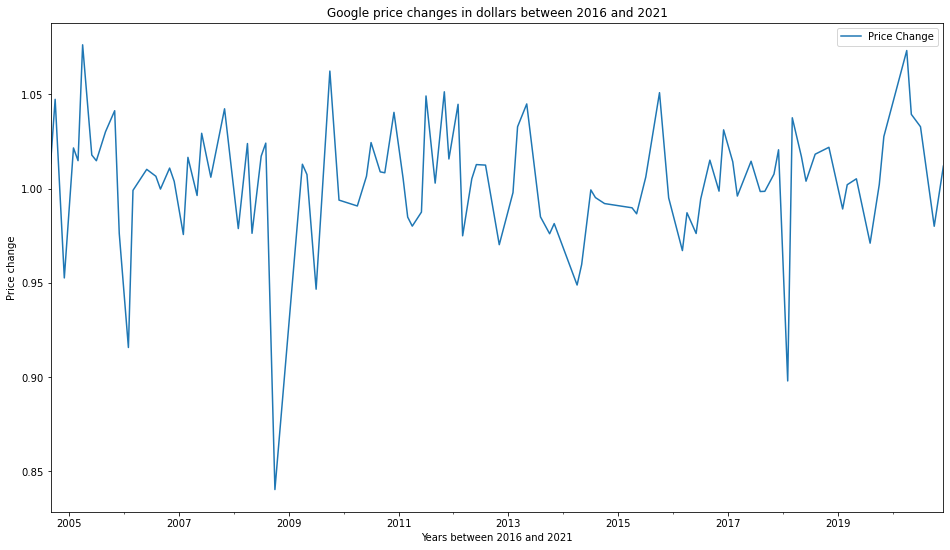

In [57]:
ax = price_change_df.plot(figsize=(16, 9), x = 'month_year', y = 'Price Change', title='Google price changes in dollars between 2016 and 2021')
ax.set_xlabel("Years between 2016 and 2021")
ax.set_ylabel("Price change")

In [58]:
Alphabet_stock['Close'].is_monotonic_increasing

False

In [59]:
price_change_df['Price Change'].is_monotonic_increasing

False

Create new column for t/f for < 1 or > 1 <br>
compute min, max, average for each window <br>
revenue, profit of the company <br>
download weka, select price change as target variables and do prediction based on the derived features <br>
Future directions: Getting larger dataset, Feature selection

In [60]:
# Derive the min, max, average 'close' for each month of alphabet stock
Alphabet_stock

,index,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA100,MA200
0,0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,NaN,NaN,NaN
1,1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,NaN,NaN,NaN
2,2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,NaN,NaN,NaN
3,3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,NaN,NaN,NaN
4,4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4165,4165,2021-03-08,2101.129883,2128.810059,2021.609985,2024.170044,2024.170044,1646000,1930.427400,1820.926801,1658.205497
4166,4166,2021-03-09,2070.000000,2078.040039,2047.829956,2052.699951,2052.699951,1696400,1936.833799,1825.737000,1661.454997
4167,4167,2021-03-10,2071.760010,2075.000000,2033.369995,2055.030029,2055.030029,1267800,1943.157400,1830.606500,1664.678047
4168,4168,2021-03-11,2074.060059,2125.699951,2072.379883,2114.770020,2114.770020,1238300,1949.931001,1836.162900,1668.166797


In [61]:
xyz = Alphabet_stock[['Date', 'Close']]
# use a grouper function to find the monthly average
xyz['Date'] = pd.to_datetime(xyz['Date'])

<ipython-input-61-a277db39c987>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xyz['Date'] = pd.to_datetime(xyz['Date'])


In [62]:
xyz1 = xyz.groupby(pd.Grouper(key = 'Date', freq = '1M')).mean()
xyz1.reset_index(inplace=True)
xyz1['month_year'] = pd.to_datetime(xyz1['Date']).dt.to_period('M')
xyz1 = xyz1[['month_year', 'Close']]

In [63]:
xyz1

,month_year,Close
0,2004-08,52.434573
1,2004-09,56.402162
2,2004-10,76.329375
3,2004-11,88.416214
4,2004-12,90.545612
...,...,...
195,2020-11,1748.348499
196,2020-12,1772.278182
197,2021-01,1808.383693
198,2021-02,2068.356824


In [64]:
xyz2 = xyz.groupby(pd.Grouper(key = 'Date', freq = '1M')).min()
xyz2.reset_index(inplace=True)
xyz2['month_year'] = pd.to_datetime(xyz2['Date']).dt.to_period('M')
xyz2 = xyz2[['month_year', 'Close']]

In [65]:
xyz2

,month_year,Close
0,2004-08,49.982655
1,2004-09,49.818268
2,2004-10,66.042458
3,2004-11,82.241737
4,2004-12,84.672623
...,...,...
195,2020-11,1626.030029
196,2020-12,1723.500000
197,2021-01,1728.239990
198,2021-02,1901.349976


In [66]:
xyz3 = xyz.groupby(pd.Grouper(key = 'Date', freq = '1M')).max()
xyz3.reset_index(inplace=True)
xyz3['month_year'] = pd.to_datetime(xyz3['Date']).dt.to_period('M')
xyz3 = xyz3[['month_year', 'Close']]

In [67]:
xyz3

,month_year,Close
0,2004-08,54.495735
1,2004-09,65.295258
2,2004-10,96.289085
3,2004-11,97.648987
4,2004-12,98.431053
...,...,...
195,2020-11,1793.189941
196,2020-12,1827.989990
197,2021-01,1917.239990
198,2021-02,2128.310059


In [68]:
price_change_df_clean = price_change_df[['month_year', 'Close', 'High_Close', 'Price Change']]

In [69]:
price_change_df_clean

,month_year,Close,High_Close,Price Change
0,2004-09,49.937820,50.600338,1.013267
1,2004-10,66.042458,69.165749,1.047292
2,2004-12,89.643990,85.394920,0.952601
3,2005-02,95.591698,97.648987,1.021522
4,2005-03,92.682602,94.052467,1.014780
...,...,...,...,...
97,2020-04,1105.619995,1186.510010,1.073163
98,2020-05,1320.609985,1372.560059,1.039338
99,2020-07,1438.040039,1485.180054,1.032781
100,2020-10,1490.089966,1460.290039,0.980001


In [70]:
merged_df_list = [xyz1, xyz2, xyz3]

In [71]:
from functools import reduce
df_final = reduce(lambda left,right: pd.merge(left,right,on='month_year'), merged_df_list)

In [72]:
df_final.rename(columns={'Close_x': 'Average Close', 'Close_y': 'Minimum Close', 'Close': 'High Close'}, inplace=True)

In [73]:
df_final

,month_year,Average Close,Minimum Close,High Close
0,2004-08,52.434573,49.982655,54.495735
1,2004-09,56.402162,49.818268,65.295258
2,2004-10,76.329375,66.042458,96.289085
3,2004-11,88.416214,82.241737,97.648987
4,2004-12,90.545612,84.672623,98.431053
...,...,...,...,...
195,2020-11,1748.348499,1626.030029,1793.189941
196,2020-12,1772.278182,1723.500000,1827.989990
197,2021-01,1808.383693,1728.239990,1917.239990
198,2021-02,2068.356824,1901.349976,2128.310059


In [74]:
price_change_df_clean.rename(columns = {'High_Close': 'High Close'})

,month_year,Close,High Close,Price Change
0,2004-09,49.937820,50.600338,1.013267
1,2004-10,66.042458,69.165749,1.047292
2,2004-12,89.643990,85.394920,0.952601
3,2005-02,95.591698,97.648987,1.021522
4,2005-03,92.682602,94.052467,1.014780
...,...,...,...,...
97,2020-04,1105.619995,1186.510010,1.073163
98,2020-05,1320.609985,1372.560059,1.039338
99,2020-07,1438.040039,1485.180054,1.032781
100,2020-10,1490.089966,1460.290039,0.980001


In [75]:
#close_price_filter = pd.merge(left = close_price_filter, right = close_price_filter1, on = ['index'])
price_change_df_clean = price_change_df_clean.merge(df_final, how = 'left', on = 'month_year')

In [76]:
price_change_df_clean.loc[price_change_df_clean['Price Change'] < 1, 'Price Change'] = 0
price_change_df_clean.loc[price_change_df_clean['Price Change'] > 1, 'Price Change'] = 1

In [77]:
price_change_df_clean1 = price_change_df_clean[['month_year', 'Close', 'Average Close', 'Minimum Close', 'High Close', 
                                         'Price Change']]

In [78]:
price_change_df_clean1

,month_year,Close,Average Close,Minimum Close,High Close,Price Change
0,2004-09,49.937820,56.402162,49.818268,65.295258,1.0
1,2004-10,66.042458,76.329375,66.042458,96.289085,1.0
2,2004-12,89.643990,90.545612,84.672623,98.431053,0.0
3,2005-02,95.591698,97.142726,92.587959,105.036301,1.0
4,2005-03,92.682602,90.240846,87.168274,94.052467,1.0
...,...,...,...,...,...,...
97,2020-04,1105.619995,1234.140480,1097.880005,1348.660034,1.0
98,2020-05,1320.609985,1381.113751,1320.609985,1428.920044,1.0
99,2020-07,1438.040039,1513.573176,1438.040039,1568.489990,1.0
100,2020-10,1490.089966,1546.828186,1453.439941,1641.000000,0.0


In [79]:
price_change_df_clean1['Price Change'] = price_change_df_clean1['Price Change'].astype(int) 

<ipython-input-79-0f43e808eeb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_change_df_clean1['Price Change'] = price_change_df_clean1['Price Change'].astype(int)


In [80]:
price_change_df_clean1

,month_year,Close,Average Close,Minimum Close,High Close,Price Change
0,2004-09,49.937820,56.402162,49.818268,65.295258,1
1,2004-10,66.042458,76.329375,66.042458,96.289085,1
2,2004-12,89.643990,90.545612,84.672623,98.431053,0
3,2005-02,95.591698,97.142726,92.587959,105.036301,1
4,2005-03,92.682602,90.240846,87.168274,94.052467,1
...,...,...,...,...,...,...
97,2020-04,1105.619995,1234.140480,1097.880005,1348.660034,1
98,2020-05,1320.609985,1381.113751,1320.609985,1428.920044,1
99,2020-07,1438.040039,1513.573176,1438.040039,1568.489990,1
100,2020-10,1490.089966,1546.828186,1453.439941,1641.000000,0


In [81]:
#price_change_df_clean1.to_csv('Google_Price_Change_data')
#price_change_df_clean1.to_excel('Google_Price_Change_data2.xlsx')
price_change_df_clean1.to_csv('Google_Price_Change_data_binary1')

use both scikit and weka to make prediction (change binary output in weka to true/false) <br>
second attempt: by how much does the price go up or down <br>
https://www.investopedia.com/terms/m/market_indicators.asp#:~:text=The%20two%20most%20common%20types,direction%20as%20a%20larger%20trend.&text=Market%20Sentiment%20indicators%20compare%20price,bearish%20on%20the%20overall%20market <br>
http://localhost:8888/edit/data%20science%20in%20practice/stock%20prediction%20yahoo%20finance/scikit_code_classifiers.py <br>
credit: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [82]:
#define features and target
X = price_change_df_clean1[['Close', 'Average Close', 'Minimum Close', 'High Close']]
y = price_change_df_clean1['Price Change']

In [83]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.25, random_state = 0)

In [84]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

#
y_pred = logreg.predict(X_test)

In [85]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 6,  6],
       [ 0, 14]])

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

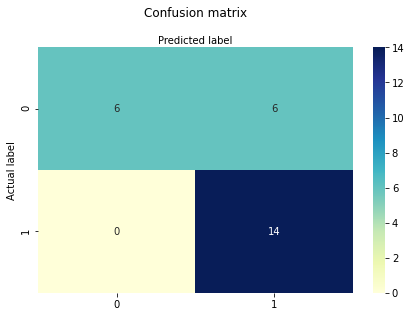

In [87]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [88]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7692307692307693
Precision: 0.7
Recall: 1.0


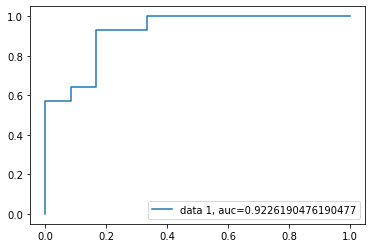

In [89]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

prepare a more realistic sample with more features, time windows: compute entropy of the price, min/max/average of the fourier transform (the absolute value), difference between min/max, standard deviation of the price inside a window, skewness of the price, linear regression coeff of the price, all-time max/mi, moving average (stick with one company for now) <br>
try other window sizes: instead of a week, try more like several months ahead, year ahead<br>
end of the window vs start of the window <br>
do correlation between different features and outcome when you have more features <br>